1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Feature maps shape: (1, 224, 224, 64)


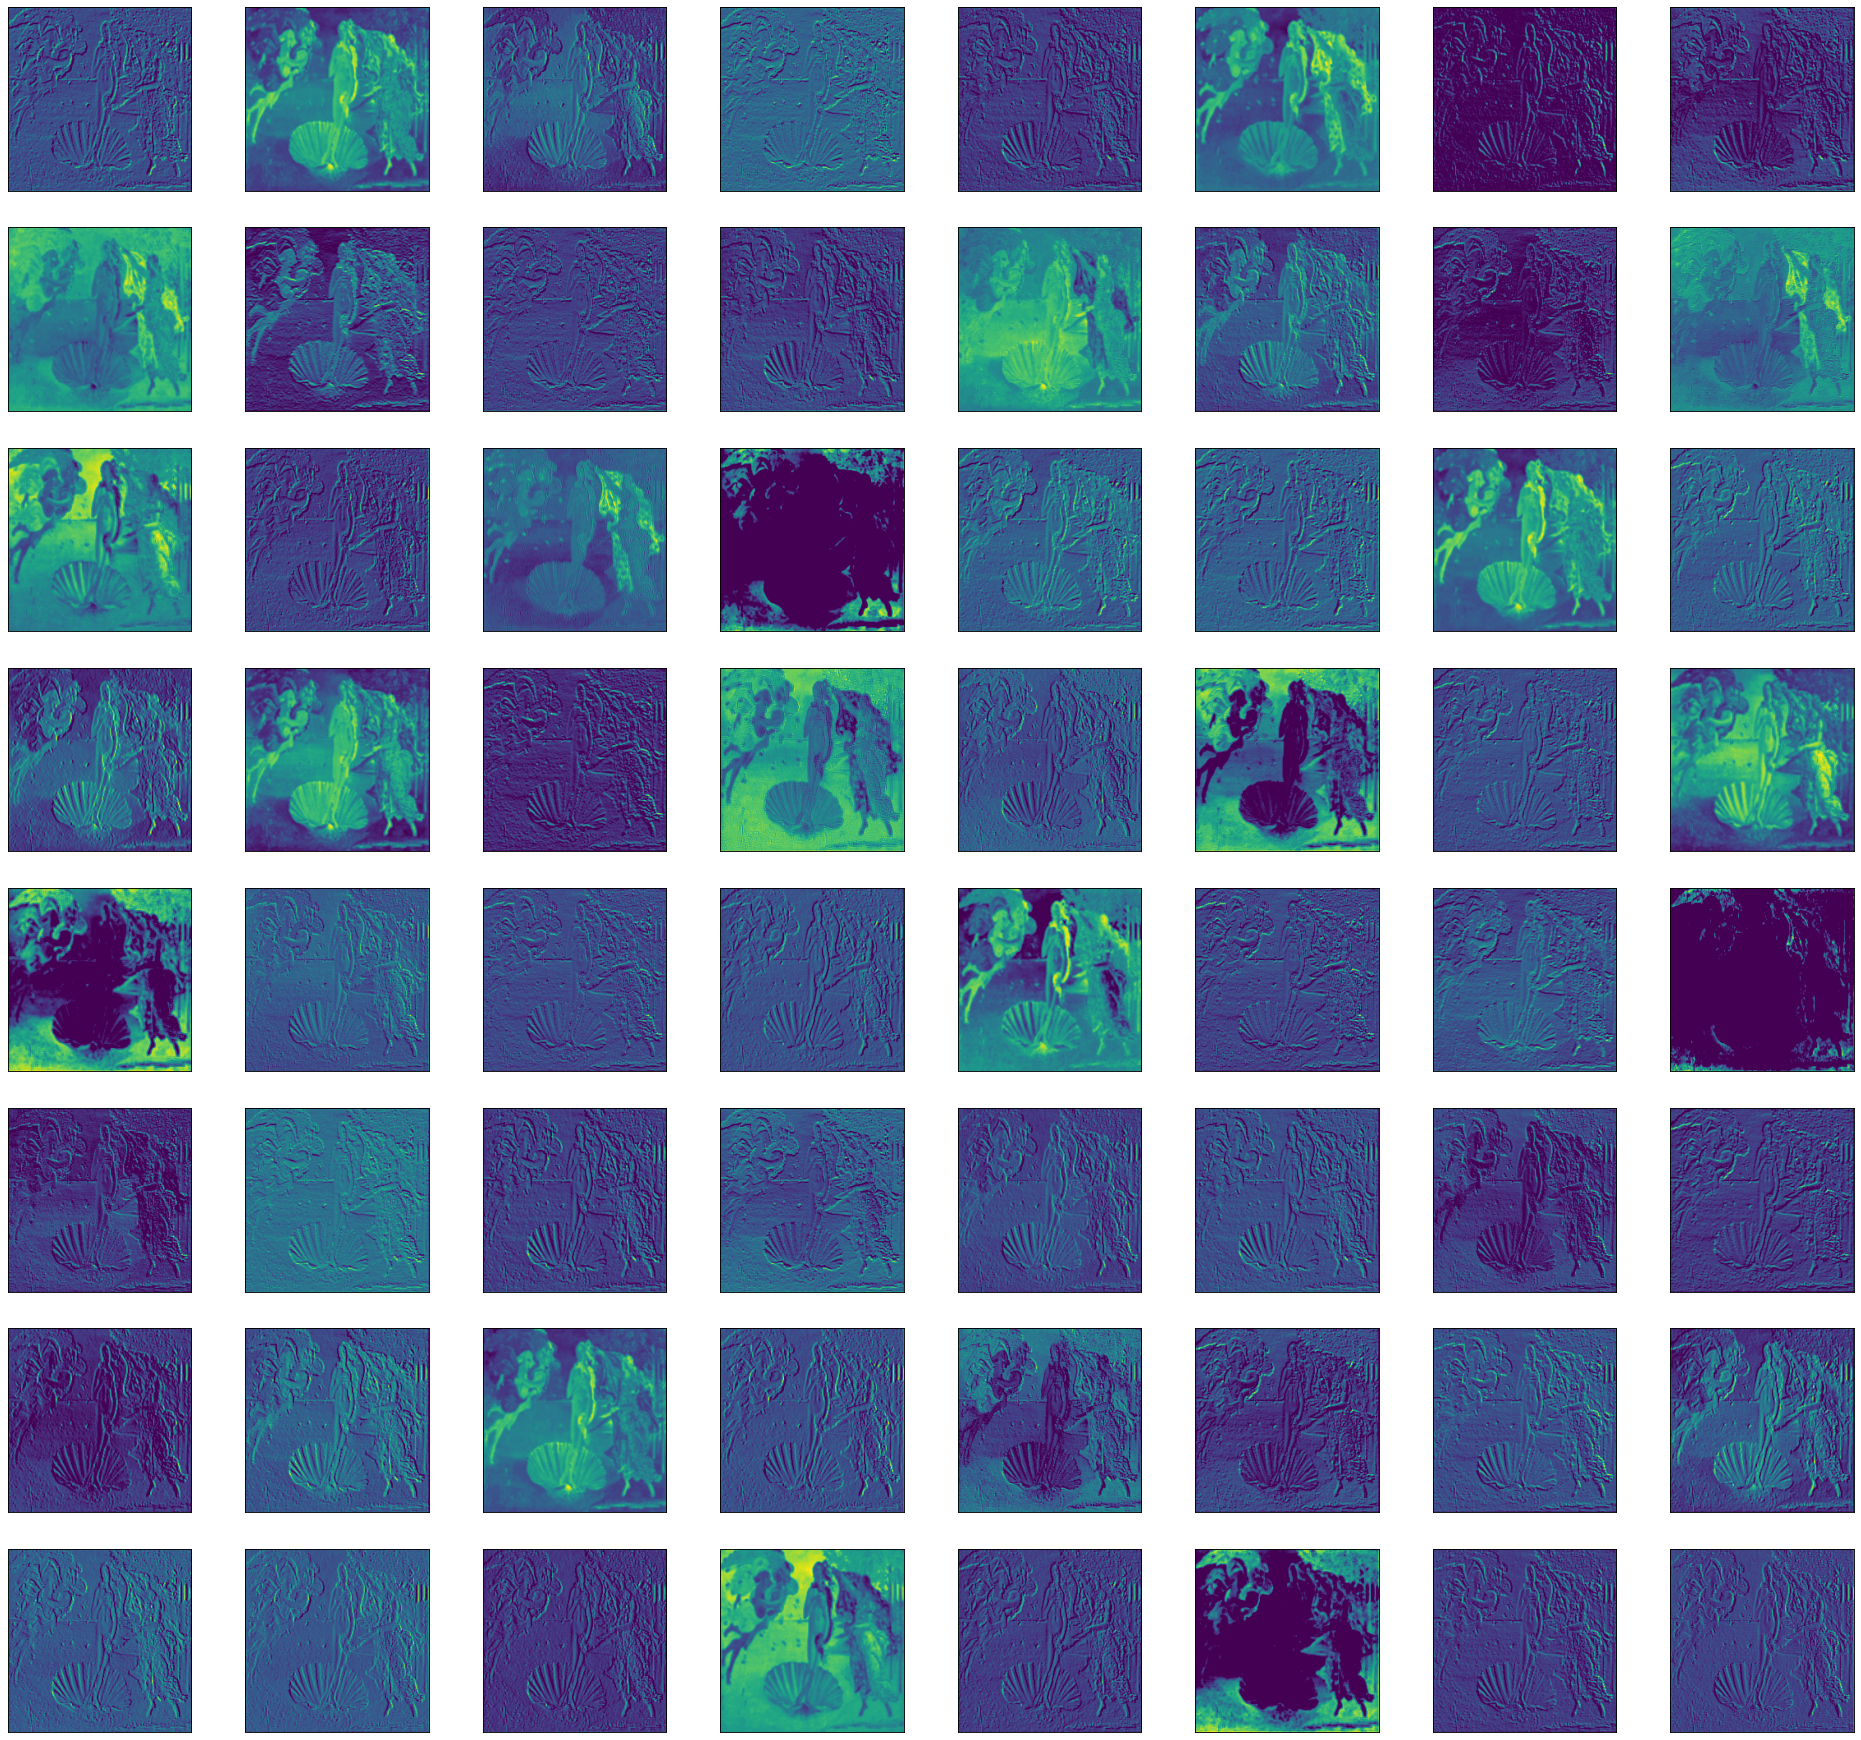

In [4]:
# Installazione delle dipendenze necessarie
!pip install tensorflow matplotlib

# Importazione delle librerie necessarie
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Carica il modello VGG16 pre-addestrato
base_model = VGG16(weights='imagenet', include_top=False)

# Funzione per caricare e preprocessare una nuova immagine
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Scala i valori dei pixel tra 0 e 1
    return img_array

# Percorso alla nuova immagine
new_image_path = 'C:/Users/Asus/Desktop/El_nacimiento_de_Venus,_por_Sandro_Botticelli.jpg'

# Carica e preprocessa la nuova immagine
new_image = load_and_preprocess_image(new_image_path)

# Definisci un nuovo modello che termina con il primo strato convoluzionale
conv_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block1_conv1').output)

# Ottieni l'output del primo strato convoluzionale
feature_maps = conv_layer_model.predict(new_image)

# Stampa l'output per il debug
print("Feature maps shape:", feature_maps.shape)

# Visualizza le mappe di attivazione dei filtri convoluzionali
def plot_feature_maps(feature_maps, square=8):
    ix = 1
    fig = plt.figure(figsize=(30, 28), dpi=80)
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
            ix += 1
    plt.show()

# Visualizza le mappe di attivazione dei filtri convoluzionali
plot_feature_maps(feature_maps)

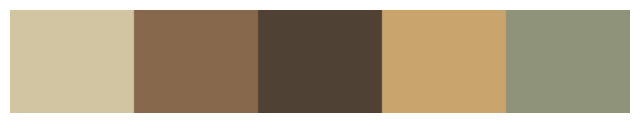

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_palette(image, n_colors=5):
    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)
    
    # Cluster the pixels and assign labels
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    palette = kmeans.cluster_centers_
    
    # Count the number of pixels in each cluster
    _, counts = np.unique(labels, return_counts=True)
    
    # Sort the palette by the number of pixels in each cluster
    sorted_palette = palette[np.argsort(-counts)]
    
    return sorted_palette

def plot_palette(palette):
    # Create a figure with a subplot
    fig, ax = plt.subplots(1, 1, figsize=(8, 2),
                           subplot_kw=dict(xticks=[], yticks=[], frame_on=False))
    
    # Create a bar chart of the palette
    bar = np.zeros((50, 300, 3), dtype='uint8')
    step = 300 // len(palette)
    for i, color in enumerate(palette):
        bar[:, i*step:(i+1)*step] = color
    
    ax.imshow(bar)
    plt.show()

# Percorso alla nuova immagine
new_image_path = 'C:/Users/Asus/Desktop/progetto/output/immagini/wikiart-target_style-class_6-keepgenre_True-merge_style_m1-flat_False/test/expressionism/expressionism_adam-baltatu_fantastic-landscape.jpg'

# Carica l'immagine
image = load_image(new_image_path)

# Ottieni la palette dei colori
palette = get_palette(image, n_colors=5)

# Visualizza la palette dei colori
plot_palette(palette)